In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pwd

'c:\\Users\\karthikeya\\Insurance_Premium_Prediction\\notebooks'

In [3]:
os.chdir("../")
%pwd

'c:\\Users\\karthikeya\\Insurance_Premium_Prediction'

In [4]:
train_df = pd.read_csv(r"artifacts\train_data.csv")

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     671980 non-null  float64
 1   gender                  683217 non-null  object 
 2   bmi                     700000 non-null  float64
 3   children                677531 non-null  float64
 4   smoker                  700000 non-null  object 
 5   region                  700000 non-null  object 
 6   medical_history         524414 non-null  object 
 7   family_medical_history  525000 non-null  object 
 8   exercise_frequency      700000 non-null  object 
 9   occupation              677531 non-null  object 
 10  coverage_level          700000 non-null  object 
 11  charges                 700000 non-null  float64
dtypes: float64(4), object(8)
memory usage: 64.1+ MB


In [6]:
train_data = train_df.iloc[:, :-1]
train_labels = train_df.iloc[:, -1]

## Checking na values

In [7]:
train_data.isna().sum()

age                        28020
gender                     16783
bmi                            0
children                   22469
smoker                         0
region                         0
medical_history           175586
family_medical_history    175000
exercise_frequency             0
occupation                 22469
coverage_level                 0
dtype: int64

## Checking duplicate values

In [8]:
train_data.duplicated().sum()

np.int64(19)

- ### There are 19 duplicate values

## Seperating numerical columns and categorical columns

In [9]:
Numerical_Cols = train_data.select_dtypes(exclude="object").columns.to_list()
Categorical_Cols= train_data.select_dtypes(exclude="float64").columns.to_list()

In [78]:
train_data[Numerical_Cols].nunique()

age           48
bmi         3201
children       6
dtype: int64

In [80]:
train_data[Numerical_Cols].describe()

,age,bmi,children
count,671980.000000,700000.000000,677531.000000
mean,41.484223,34.000267,2.499512
std,13.854470,9.233326,1.707266
min,18.000000,18.000000,0.000000
25%,29.000000,26.020000,1.000000
50%,41.000000,33.990000,2.000000
75%,53.000000,41.980000,4.000000
max,65.000000,50.000000,5.000000


In [79]:
train_data[Categorical_Cols].describe()

,gender,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level
count,683217,700000,700000,524414,525000,700000,677531,700000
unique,2,2,4,3,3,4,4,3
top,male,yes,northeast,Heart disease,High blood pressure,Frequently,Unemployed,Basic
freq,341890,350008,175278,175251,175171,175214,169898,234045


<Axes: xlabel='charges', ylabel='Count'>

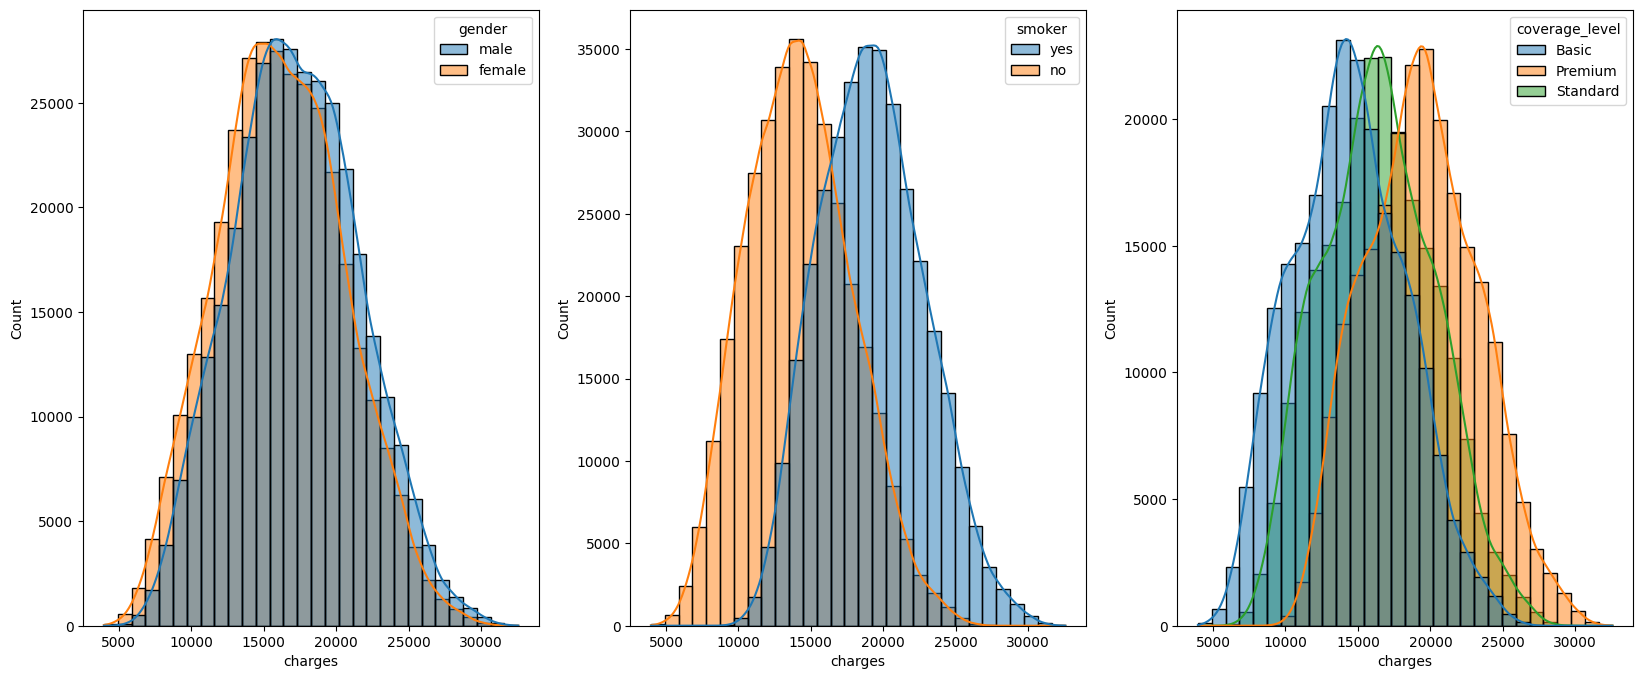

In [102]:
fig, axs = plt.subplots(1, 3, figsize =(20,8))
plt.subplot(1,3,1)
sns.histplot(data=train_df, x='charges', bins=30, kde=True, hue='gender')
plt.subplot(1,3,2)
sns.histplot(data=train_df, x='charges', bins=30, kde=True, hue='smoker')
plt.subplot(1,3,3)
sns.histplot(data=train_df, x="charges",bins=30, kde=True, hue='coverage_level')

<Axes: xlabel='charges', ylabel='Count'>

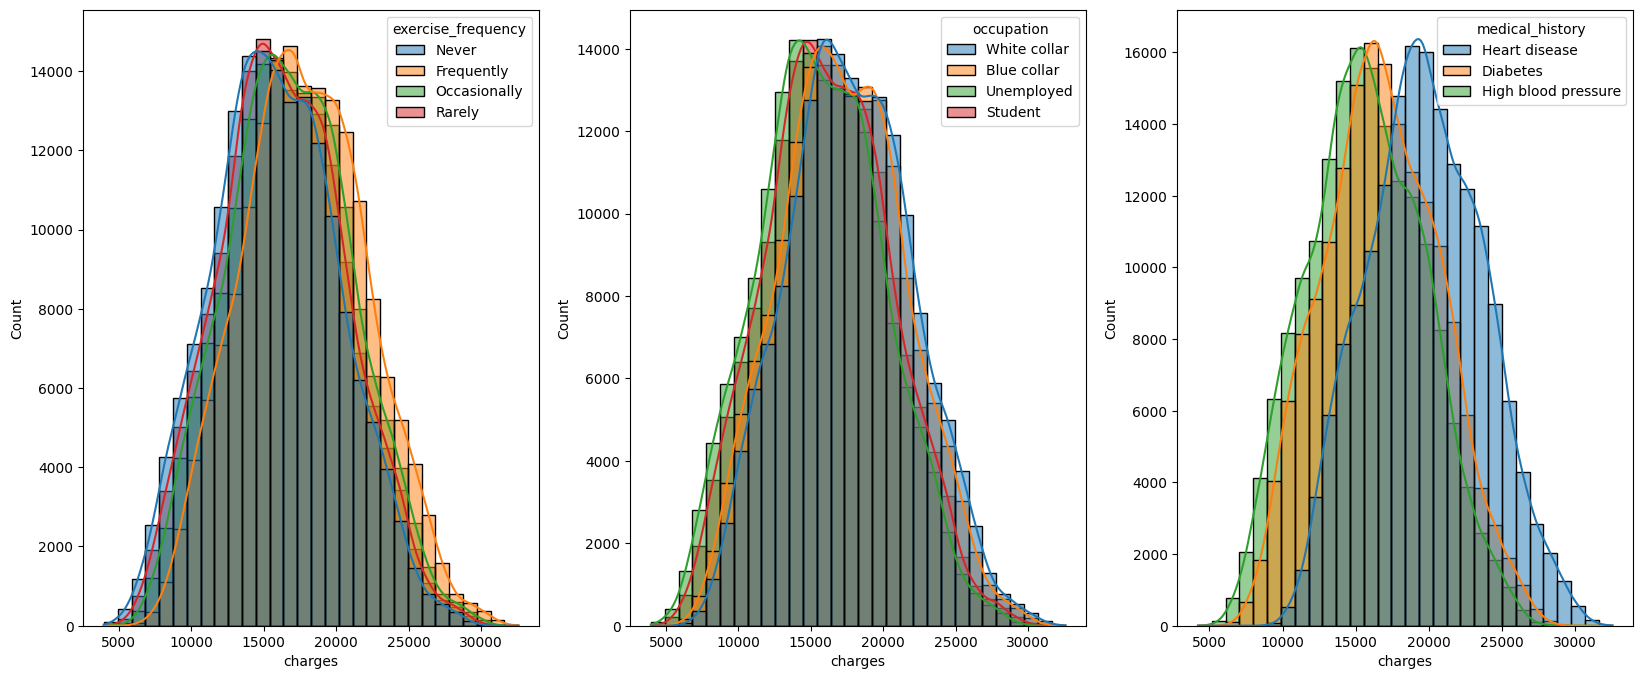

In [96]:
fig,axs = plt.subplots(1,3, figsize=(20,8))
plt.subplot(1,3,1)
sns.histplot(data=train_df, x="charges",bins=30, kde=True, hue='exercise_frequency')
plt.subplot(1,3,2)
sns.histplot(data=train_df, x="charges",bins=30, kde=True, hue='occupation')
plt.subplot(1,3,3)
sns.histplot(data=train_df, x="charges",bins=30, kde=True, hue='medical_history')

- ### People who are exercising frequently are paying more than other people
- ### People with Heart conditions are paying more than people with other conditions

In [99]:
pd.crosstab(train_data['medical_history'], train_data['exercise_frequency'])

exercise_frequency,Frequently,Never,Occasionally,Rarely
medical_history,,,,
Diabetes,43586,43543,43465,43864
Heart disease,43840,43631,44064,43716
High blood pressure,43885,43550,43589,43681


In [100]:
pd.crosstab(train_data['family_medical_history'], train_data['exercise_frequency'])

exercise_frequency,Frequently,Never,Occasionally,Rarely
family_medical_history,,,,
Diabetes,44094,43627,43465,43640
Heart disease,43753,43696,43647,43907
High blood pressure,43633,43928,44022,43588
